라이브러리 임포트

In [4]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat

from skimage.io import imread, imsave, imshow, show
from skimage.io import imread_collection, imshow_collection
from skimage import color, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage

from scipy.ndimage import affine_transform, zoom
from scipy import misc

import matplotlib.image as mpimg
import matplotlib.pylab as plt

#  PIL을 사용한 영상 읽기, 영상 저장, 영상 표시

영상 읽기

In [3]:
im = Image.open("../images/parrot.png")        # 영상 읽기, 영상 파일 경로 주의
print(im.width, im.height, im.mode, im.format, type(im)) 
# 453 340 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>
im.show()         # 영상 표시

453 340 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>


In [ ]:
저장 및 표시

In [10]:
im_g = im.convert('L') # convert the RGB color image to a grayscale image
im_g.save('../images/parrot_gray.png') # save the image to disk
Image.open("../images/parrot_gray.png").show() # read the grayscale image from disk and show

# Matplotlib를 사용한 영상 읽기, 영상 저장, 영상 표시

In [ ]:
영상 읽기 및 그리프 표시

(960, 1280, 4) float32 <class 'numpy.ndarray'>


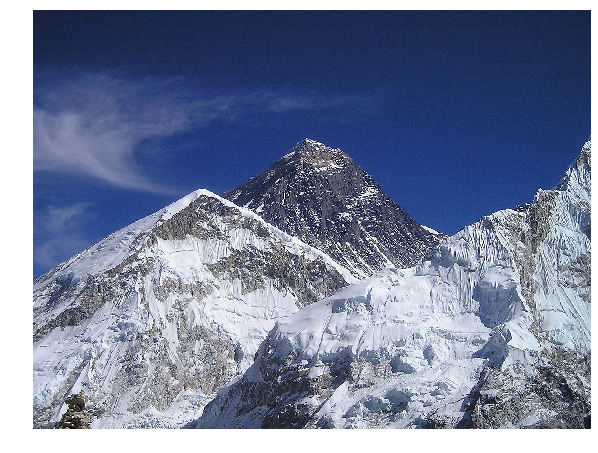

In [14]:
im = mpimg.imread("../images/hill.png")  	# numpy ndarray 영상 읽기
print(im.shape, im.dtype, type(im))      	# png 파일은 α 채널 포함
# (960, 1280, 4) float32 <class 'numpy.ndarray'>

plt.figure(figsize=(10,10))
plt.imshow(im), plt.axis('off')
plt.show()

In [ ]:
영상 저장 및 표시

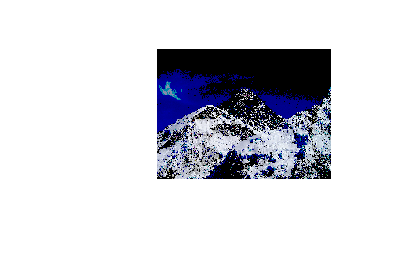

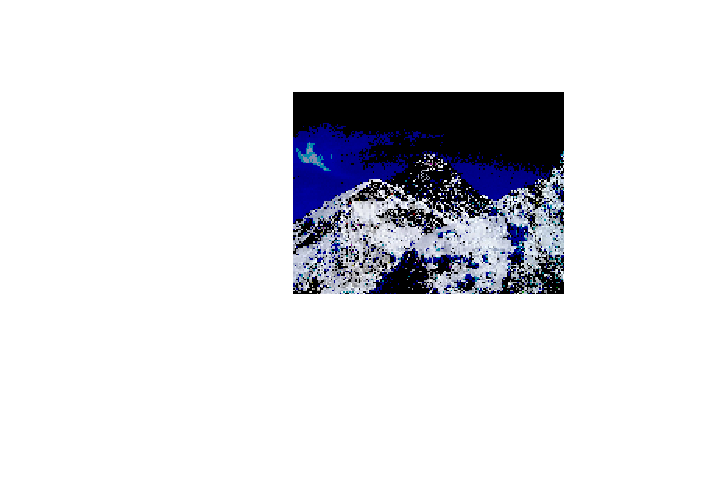

In [20]:
im1 = im
im1[im1 < 0.5] = 0            						# 어두운 영상 생성

plt.imshow(im1)										# 영상 그리기
plt.axis('off')										# 그래프에 축 없음
plt.tight_layout()
plt.savefig("../images/hill_dark.png")         		# 영상 저장
im = mpimg.imread("../images/hill_dark.png")  		# 저장 영상 읽기

plt.figure(figsize=(10,10))
plt.imshow(im), plt.axis('off'), plt.tight_layout() # 한 행에 수행 가능
plt.show()											# 영상 표시

In [ ]:
Matplotlib imshow()를 사용한 표시와 보간법 

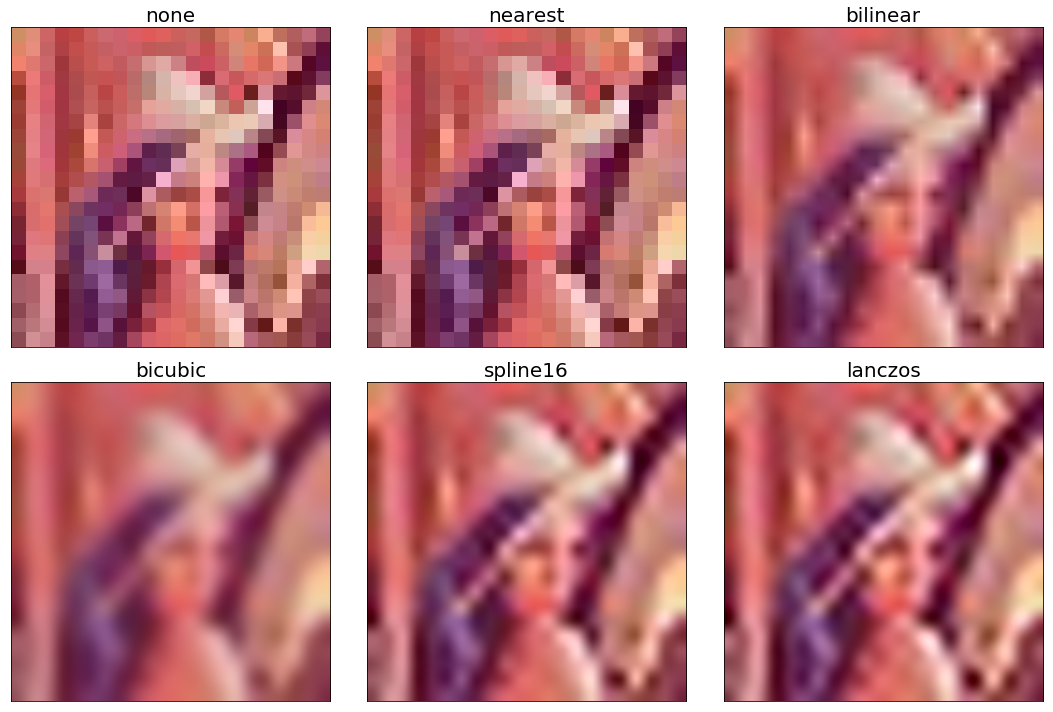

In [26]:
im = mpimg.imread("../images/lena_small.jpg") # ndarray 영상 읽기
methods = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), 
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.05, wspace=0.05)
for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(im, interpolation=interp_method)
    ax.set_title(str(interp_method), size=20)
plt.tight_layout()
plt.show()

# scikit-image를 사용한 영상 읽기, 저장, 표시

(340, 453, 3) uint8 <class 'numpy.ndarray'>


C:\Users\bae22\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


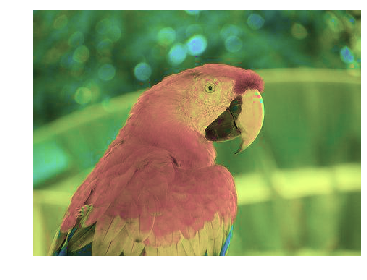

In [2]:
im = imread("../images/parrot.png") 	# 영상 읽기
print(im.shape, im.dtype, type(im)) 	# (362, 486, 3) uint8 <class 'numpy.ndarray'>

hsv = color.rgb2hsv(im)         		# 컬러 공간 변환 (RGB --> HSV)
hsv[:, :, 1] = 0.5              		# 채도 채널 값 변경 
im1 = color.hsv2rgb(hsv)        		# 컬러 공간 환원(HSV --> RGB)

imsave('../images/parrot_hsv.png', im1)	# 영상 저장
im = imread("../images/parrot_hsv.png")
plt.axis('off'), imshow(im)
show()